# **Wiktor Ciołek LSED lab4 17.04.2024**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from scipy.stats import multivariate_normal as mvnorm

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True

In [41]:
def get_data(n:int, mu, S):
    X = np.random.multivariate_normal(mu, S, n)
    return X

# Data generated

In [42]:
mu1, mu2 = [-1, -1], [2, 2]
sd1 = [[4, 2], [2, 4]]
sd2 = [[4, 2], [2, 4]]
n1, n2 = 30, 20

X1 = get_data(n1, mu1, sd1)
X2 = get_data(n2, mu2, sd2)

data = np.concatenate((X1, X2), axis = 0)
data = pd.DataFrame(data, columns=["x", "y"])

data["class"] = np.repeat([0, 1], [n1, n2])
data.sample(6)

,x,y,class
30,2.089765,2.539964,1
3,-2.416735,-0.768169,0
13,-0.312309,-2.612340,0
47,5.957880,4.354819,1
49,3.645882,1.767653,1
9,3.374766,0.875796,0


# Data visualized

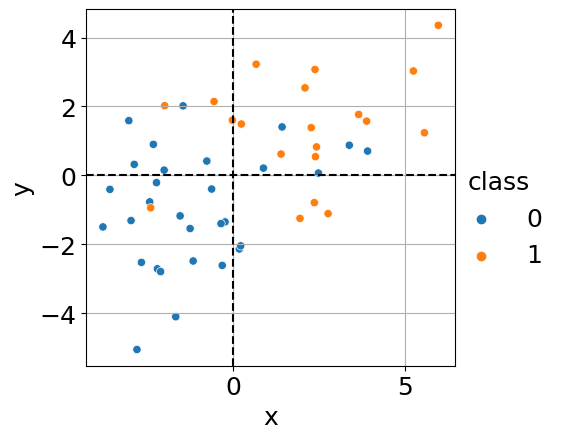

In [43]:
g = sns.relplot(data, x='x', y='y', hue='class')
g.ax.spines['top'].set_visible(True)
g.ax.spines['right'].set_visible(True)
g.ax.set_aspect('equal')
plt.axvline(0, linestyle='--', color='black')
plt.axhline(0, linestyle='--', color='black')

# Data described

In [44]:
S1 = np.cov(X1, rowvar=False)
S2 = np.cov(X2, rowvar=False)
print("COVARIANCE MATRIXES")
print("Class 0")
print(S1)
print("Class 1")
print(S2)
S = np.array([S1, S2])

Mu1 = np.average(X1, axis = 0)
Mu2 = np.average(X2, axis = 0)
print("\nMEANS")
print("Class 0")
print(Mu1)
print("Class 1")
print(Mu2)

COVARIANCE MATRIXES
Class 0
[[3.81787551 0.95152378]
 [0.95152378 2.86862916]]
Class 1
[[5.11422193 0.96419546]
 [0.96419546 2.38134376]]

MEANS
Class 0
[-1.05721119 -0.92807705]
Class 1
[2.01277035 1.3675891 ]


# Cross-Val comparison of different k

Text(0.5, 0.98, 'Average scores for Cross-Validation')

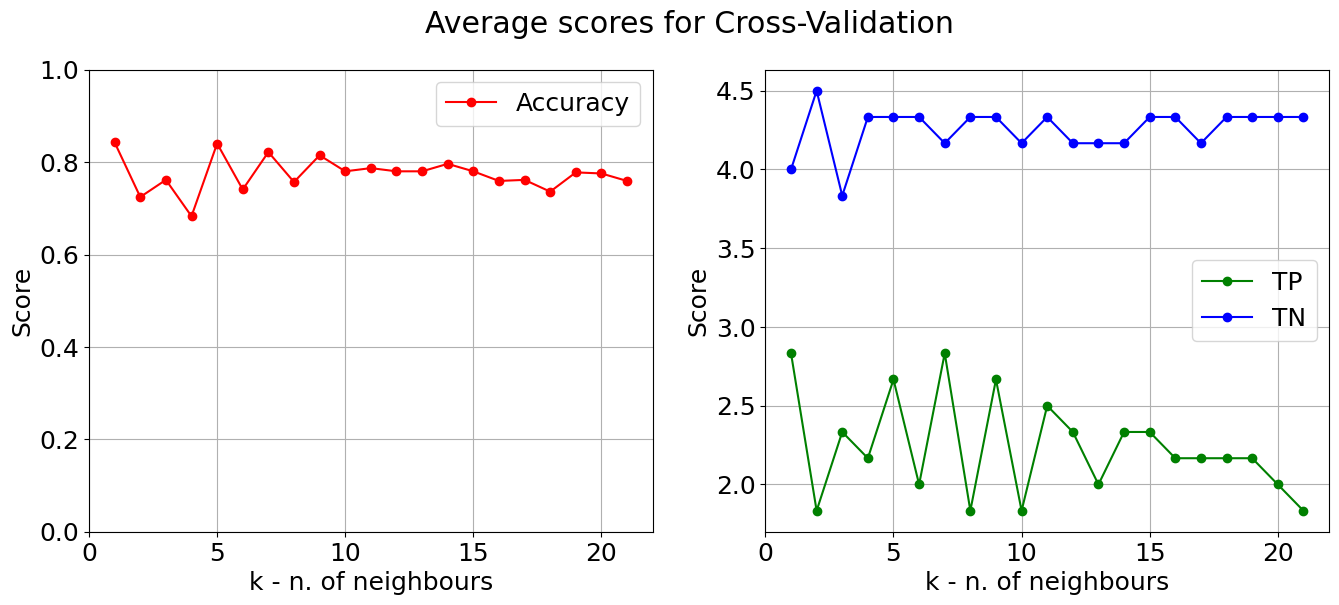

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

def tp_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = metrics.confusion_matrix(y, y_pred, labels=[0,1])
    return cm[1,1]

def tn_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = metrics.confusion_matrix(y, y_pred, labels=[0,1])
    return cm[0,0]

X = data[['x', 'y']]
y = data['class']

K = np.arange(1, 22)
Acc, TP, TN = [], [], []
kf = KFold(n_splits=6, shuffle=True)
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, y)
    acc = cross_val_score(knn, X, y, cv = kf, scoring='accuracy')
    tp = cross_val_score(knn, X, y, cv = kf, scoring=tp_scorer)
    tn = cross_val_score(knn, X, y, cv = kf, scoring=tn_scorer)
    Acc.append(acc.mean())
    TP.append(tp.mean())
    TN.append(tn.mean())

fig, ax = plt.subplots(ncols=2, figsize=(16,6))

ax[0].plot(K, Acc, 'or-', label='Accuracy')
ax[0].set_ylim(0,1)

ax[1].plot(K, TP, 'og-', label='TP')
ax[1].plot(K, TN, 'ob-', label='TN')
for a in ax:
    a.set_xlabel("k - n. of neighbours")
    a.set_ylabel("Score")
    a.legend()
fig.suptitle("Average scores for Cross-Validation")


# Comparison of different k on new test sets

c:\Users\cp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\cp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\cp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\cp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\cp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\cp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not 

Text(0.5, 0.98, 'Average scores for new test set')

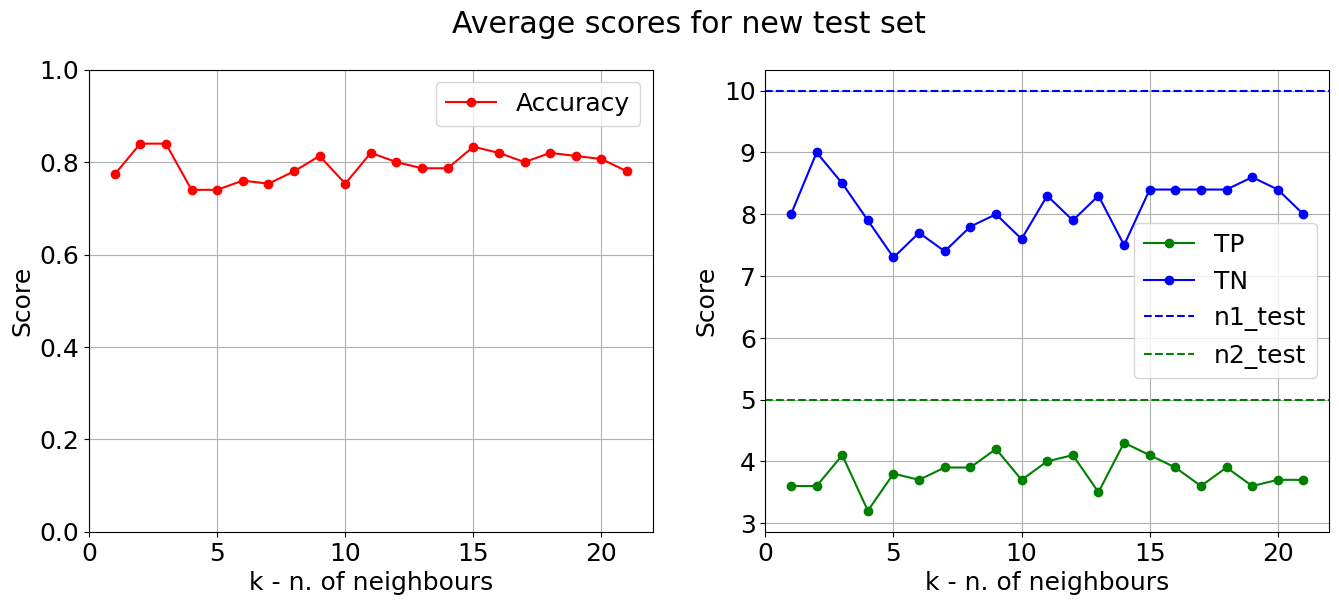

In [51]:
K = np.arange(1, 22)
Acc, TP, TN = [], [], []

for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X, y)
    # mean for 10 different new test sets
    _acc_sum, _tp_sum, _tn_sum = 0, 0, 0
    for _ in range(10):
        n1_new, n2_new = 10, 5
        X1_test = get_data(n1_new, mu1, sd1)
        X2_test = get_data(n2_new, mu2, sd2)

        X_test = np.concatenate((X1_test, X2_test), axis = 0)
        y_test = np.repeat([0,1], [n1_new, n2_new])
        y_pred = knn.predict(X_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
        tp = cm[1,1]
        tn = cm[0,0]
        _acc_sum += acc
        _tp_sum += tp
        _tn_sum += tn

    Acc.append(_acc_sum / 10)
    TP.append(_tp_sum / 10)
    TN.append(_tn_sum / 10)


fig, ax = plt.subplots(ncols=2, figsize=(16,6))

ax[0].plot(K, Acc, 'or-', label='Accuracy')
ax[0].set_ylim(0,1)

ax[1].plot(K, TP, 'og-', label='TP')
ax[1].plot(K, TN, 'ob-', label='TN')
ax[1].axhline(n1_new, linestyle='--', color='b', label='n1_test')
ax[1].axhline(n2_new, linestyle='--', color='g', label='n2_test')
for a in ax:
    a.set_xlabel("k - n. of neighbours")
    a.set_ylabel("Score")
    a.legend()
fig.suptitle("Average scores for new test set")